In [1]:
# mount gdrive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import sys
folder = '/content/gdrive/My Drive/S7_v1.3'
sys.path.append(folder)

In [3]:
import os
os.getcwd()

'/content'

In [4]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/S7_v1.3']

In [5]:
%cd '/content/gdrive/My Drive/S7_v1.3'

/content/gdrive/My Drive/S7_v1.3


In [6]:
os.getcwd()

'/content/gdrive/My Drive/S7_v1.3'

# Utilized configuration file for specifying the values and can be changed by user without modifying the code

In [7]:
import main


 CUDA is available

 CUDA is available


In [8]:
import CONSTANTS, model, train_test, train_test_dataloader, utility
from model import Net, GBNNet

#### Get transformers and datasets

In [9]:
train_transforms, test_transforms = train_test_dataloader.define_train_test_transformers()

train_data, test_data = train_test_dataloader.download_data(train_transforms=train_transforms,
                                                                test_transforms=test_transforms)

#### Get Dataloaders

In [10]:
train_loader, test_loader = train_test_dataloader.get_train_test_dataloaders(train_data=train_data,
                                                                                 test_data=test_data,
                                                                                 data_loader_args=utility.dataloader_args)

#### Get all regularization combos from config file

In [12]:
all_regularizations_list, tracker = utility.get_combos_and_trackers()

In [13]:
all_regularizations_list

['L1+BN', ' L2+BN', ' L1+L2+BN', ' GBN', ' L1+L2+GBN']

In [15]:
device = utility.get_device()
device


 CUDA is available


'cuda'

In [16]:
for combo in all_regularizations_list:
    print("\nRunning for: ", combo)
    if CONSTANTS.GBN in combo.lower():
        model = GBNNet().to(device)
    else:
        model = Net().to(device)

    optimizer = utility.get_optimizer(model=model)
    scheduler = utility.get_scheduler(optimizer=optimizer)

    train_test.train(model=model, device=device, train_loader=train_loader, optimizer=optimizer,
                     epochs=int(utility.get_config_details()[CONSTANTS.MODEL_CONFIG][CONSTANTS.EPOCHS]),
                     scheduler=scheduler,
                     test=True, test_loader=test_loader, type_=combo, tracker=tracker,
                     l1_lambda=float(utility.get_config_details()[CONSTANTS.REGULARIZATION][CONSTANTS.L1]),
                     l2_lambda=float(utility.get_config_details()[CONSTANTS.REGULARIZATION][CONSTANTS.L2]))


Running for:  L1+BN


  0%|          | 0/469 [00:00<?, ?it/s]



epoch: 1


100%|██████████| 469/469 [00:15<00:00, 29.73it/s]


Train set: 		 Accuracy: 22615/60000 (37.691667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.4427, Accuracy: 6771/10000 (67.710000%)



epoch: 2


100%|██████████| 469/469 [00:15<00:00, 31.11it/s]


Train set: 		 Accuracy: 52693/60000 (87.821667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1628, Accuracy: 9511/10000 (95.110000%)



epoch: 3


100%|██████████| 469/469 [00:15<00:00, 31.16it/s]


Train set: 		 Accuracy: 57266/60000 (95.443333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0873, Accuracy: 9734/10000 (97.340000%)



epoch: 4


100%|██████████| 469/469 [00:15<00:00, 31.17it/s]


Train set: 		 Accuracy: 57911/60000 (96.518333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0909, Accuracy: 9722/10000 (97.220000%)



epoch: 5


100%|██████████| 469/469 [00:15<00:00, 31.08it/s]


Train set: 		 Accuracy: 58203/60000 (97.005000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0734, Accuracy: 9774/10000 (97.740000%)



epoch: 6


100%|██████████| 469/469 [00:15<00:00, 31.26it/s]


Train set: 		 Accuracy: 58522/60000 (97.536667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0613, Accuracy: 9805/10000 (98.050000%)



epoch: 7


100%|██████████| 469/469 [00:14<00:00, 31.30it/s]


Train set: 		 Accuracy: 58656/60000 (97.760000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0556, Accuracy: 9833/10000 (98.330000%)



epoch: 8


100%|██████████| 469/469 [00:14<00:00, 31.54it/s]


Train set: 		 Accuracy: 58739/60000 (97.898333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0465, Accuracy: 9848/10000 (98.480000%)



epoch: 9


100%|██████████| 469/469 [00:14<00:00, 31.57it/s]


Train set: 		 Accuracy: 58821/60000 (98.035000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0450, Accuracy: 9851/10000 (98.510000%)



epoch: 10


100%|██████████| 469/469 [00:15<00:00, 31.06it/s]


Train set: 		 Accuracy: 58907/60000 (98.178333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0427, Accuracy: 9866/10000 (98.660000%)



epoch: 11


100%|██████████| 469/469 [00:14<00:00, 31.43it/s]


Train set: 		 Accuracy: 58961/60000 (98.268333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0522, Accuracy: 9844/10000 (98.440000%)



epoch: 12


100%|██████████| 469/469 [00:15<00:00, 31.12it/s]


Train set: 		 Accuracy: 59025/60000 (98.375000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0407, Accuracy: 9870/10000 (98.700000%)



epoch: 13


100%|██████████| 469/469 [00:14<00:00, 31.61it/s]


Train set: 		 Accuracy: 58981/60000 (98.301667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0411, Accuracy: 9867/10000 (98.670000%)



epoch: 14


100%|██████████| 469/469 [00:14<00:00, 31.66it/s]


Train set: 		 Accuracy: 59081/60000 (98.468333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0404, Accuracy: 9881/10000 (98.810000%)



epoch: 15


100%|██████████| 469/469 [00:14<00:00, 31.94it/s]


Train set: 		 Accuracy: 59114/60000 (98.523333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0365, Accuracy: 9887/10000 (98.870000%)



epoch: 16


100%|██████████| 469/469 [00:14<00:00, 31.55it/s]


Train set: 		 Accuracy: 59134/60000 (98.556667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0371, Accuracy: 9883/10000 (98.830000%)



epoch: 17


100%|██████████| 469/469 [00:14<00:00, 31.40it/s]


Train set: 		 Accuracy: 59163/60000 (98.605000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0449, Accuracy: 9861/10000 (98.610000%)



epoch: 18


100%|██████████| 469/469 [00:14<00:00, 31.84it/s]


Train set: 		 Accuracy: 59205/60000 (98.675000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0351, Accuracy: 9887/10000 (98.870000%)



epoch: 19


100%|██████████| 469/469 [00:14<00:00, 31.88it/s]


Train set: 		 Accuracy: 59178/60000 (98.630000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0351, Accuracy: 9892/10000 (98.920000%)



epoch: 20


100%|██████████| 469/469 [00:14<00:00, 32.07it/s]


Train set: 		 Accuracy: 59251/60000 (98.751667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0345, Accuracy: 9893/10000 (98.930000%)



epoch: 21


100%|██████████| 469/469 [00:14<00:00, 31.47it/s]


Train set: 		 Accuracy: 59259/60000 (98.765000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9895/10000 (98.950000%)



epoch: 22


100%|██████████| 469/469 [00:14<00:00, 31.75it/s]


Train set: 		 Accuracy: 59261/60000 (98.768333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0326, Accuracy: 9897/10000 (98.970000%)



epoch: 23


100%|██████████| 469/469 [00:14<00:00, 31.95it/s]


Train set: 		 Accuracy: 59260/60000 (98.766667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0355, Accuracy: 9893/10000 (98.930000%)



epoch: 24


100%|██████████| 469/469 [00:14<00:00, 31.71it/s]


Train set: 		 Accuracy: 59281/60000 (98.801667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0338, Accuracy: 9897/10000 (98.970000%)



epoch: 25


100%|██████████| 469/469 [00:14<00:00, 31.62it/s]


Train set: 		 Accuracy: 59300/60000 (98.833333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9903/10000 (99.030000%)


Running for:   L2+BN


epoch: 1


100%|██████████| 469/469 [00:14<00:00, 31.55it/s]


Train set: 		 Accuracy: 19563/60000 (32.605000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.6020, Accuracy: 6382/10000 (63.820000%)



epoch: 2


100%|██████████| 469/469 [00:14<00:00, 32.50it/s]


Train set: 		 Accuracy: 49026/60000 (81.710000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1703, Accuracy: 9511/10000 (95.110000%)



epoch: 3


100%|██████████| 469/469 [00:14<00:00, 32.72it/s]


Train set: 		 Accuracy: 56855/60000 (94.758333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0999, Accuracy: 9709/10000 (97.090000%)



epoch: 4


100%|██████████| 469/469 [00:14<00:00, 32.74it/s]


Train set: 		 Accuracy: 57857/60000 (96.428333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0718, Accuracy: 9787/10000 (97.870000%)



epoch: 5


100%|██████████| 469/469 [00:14<00:00, 32.76it/s]


Train set: 		 Accuracy: 58223/60000 (97.038333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0608, Accuracy: 9830/10000 (98.300000%)



epoch: 6


100%|██████████| 469/469 [00:14<00:00, 32.60it/s]


Train set: 		 Accuracy: 58486/60000 (97.476667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0524, Accuracy: 9841/10000 (98.410000%)



epoch: 7


100%|██████████| 469/469 [00:14<00:00, 33.15it/s]


Train set: 		 Accuracy: 58660/60000 (97.766667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0465, Accuracy: 9860/10000 (98.600000%)



epoch: 8


100%|██████████| 469/469 [00:14<00:00, 32.97it/s]


Train set: 		 Accuracy: 58756/60000 (97.926667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0508, Accuracy: 9850/10000 (98.500000%)



epoch: 9


100%|██████████| 469/469 [00:14<00:00, 32.69it/s]


Train set: 		 Accuracy: 58875/60000 (98.125000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0415, Accuracy: 9884/10000 (98.840000%)



epoch: 10


100%|██████████| 469/469 [00:14<00:00, 31.92it/s]


Train set: 		 Accuracy: 58875/60000 (98.125000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0369, Accuracy: 9888/10000 (98.880000%)



epoch: 11


100%|██████████| 469/469 [00:14<00:00, 32.62it/s]


Train set: 		 Accuracy: 58965/60000 (98.275000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0345, Accuracy: 9893/10000 (98.930000%)



epoch: 12


100%|██████████| 469/469 [00:14<00:00, 32.89it/s]


Train set: 		 Accuracy: 59024/60000 (98.373333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0344, Accuracy: 9901/10000 (99.010000%)



epoch: 13


100%|██████████| 469/469 [00:14<00:00, 33.14it/s]


Train set: 		 Accuracy: 59030/60000 (98.383333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0370, Accuracy: 9875/10000 (98.750000%)



epoch: 14


100%|██████████| 469/469 [00:14<00:00, 33.00it/s]


Train set: 		 Accuracy: 59080/60000 (98.466667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0332, Accuracy: 9900/10000 (99.000000%)



epoch: 15


100%|██████████| 469/469 [00:14<00:00, 32.85it/s]


Train set: 		 Accuracy: 59126/60000 (98.543333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0362, Accuracy: 9888/10000 (98.880000%)



epoch: 16


100%|██████████| 469/469 [00:14<00:00, 32.70it/s]


Train set: 		 Accuracy: 59170/60000 (98.616667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0392, Accuracy: 9890/10000 (98.900000%)



epoch: 17


100%|██████████| 469/469 [00:14<00:00, 33.18it/s]


Train set: 		 Accuracy: 59158/60000 (98.596667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0299, Accuracy: 9903/10000 (99.030000%)



epoch: 18


100%|██████████| 469/469 [00:14<00:00, 33.46it/s]


Train set: 		 Accuracy: 59213/60000 (98.688333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0323, Accuracy: 9902/10000 (99.020000%)



epoch: 19


100%|██████████| 469/469 [00:14<00:00, 33.19it/s]


Train set: 		 Accuracy: 59209/60000 (98.681667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0278, Accuracy: 9920/10000 (99.200000%)



epoch: 20


100%|██████████| 469/469 [00:14<00:00, 33.21it/s]


Train set: 		 Accuracy: 59277/60000 (98.795000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9911/10000 (99.110000%)



epoch: 21


100%|██████████| 469/469 [00:14<00:00, 32.91it/s]


Train set: 		 Accuracy: 59275/60000 (98.791667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 9915/10000 (99.150000%)



epoch: 22


100%|██████████| 469/469 [00:14<00:00, 33.50it/s]


Train set: 		 Accuracy: 59250/60000 (98.750000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0279, Accuracy: 9915/10000 (99.150000%)



epoch: 23


100%|██████████| 469/469 [00:13<00:00, 33.62it/s]


Train set: 		 Accuracy: 59302/60000 (98.836667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0292, Accuracy: 9914/10000 (99.140000%)



epoch: 24


100%|██████████| 469/469 [00:14<00:00, 33.23it/s]


Train set: 		 Accuracy: 59309/60000 (98.848333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0260, Accuracy: 9920/10000 (99.200000%)



epoch: 25


100%|██████████| 469/469 [00:14<00:00, 32.83it/s]


Train set: 		 Accuracy: 59296/60000 (98.826667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0250, Accuracy: 9914/10000 (99.140000%)


Running for:   L1+L2+BN


epoch: 1


100%|██████████| 469/469 [00:15<00:00, 30.90it/s]


Train set: 		 Accuracy: 20522/60000 (34.203333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.5242, Accuracy: 6409/10000 (64.090000%)



epoch: 2


100%|██████████| 469/469 [00:14<00:00, 32.15it/s]


Train set: 		 Accuracy: 50631/60000 (84.385000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1763, Accuracy: 9502/10000 (95.020000%)



epoch: 3


100%|██████████| 469/469 [00:14<00:00, 32.46it/s]


Train set: 		 Accuracy: 56827/60000 (94.711667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0986, Accuracy: 9716/10000 (97.160000%)



epoch: 4


100%|██████████| 469/469 [00:14<00:00, 31.95it/s]


Train set: 		 Accuracy: 57792/60000 (96.320000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0827, Accuracy: 9752/10000 (97.520000%)



epoch: 5


100%|██████████| 469/469 [00:14<00:00, 32.69it/s]


Train set: 		 Accuracy: 58323/60000 (97.205000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0581, Accuracy: 9825/10000 (98.250000%)



epoch: 6


100%|██████████| 469/469 [00:14<00:00, 32.65it/s]


Train set: 		 Accuracy: 58567/60000 (97.611667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0497, Accuracy: 9844/10000 (98.440000%)



epoch: 7


100%|██████████| 469/469 [00:14<00:00, 32.83it/s]


Train set: 		 Accuracy: 58706/60000 (97.843333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0498, Accuracy: 9856/10000 (98.560000%)



epoch: 8


100%|██████████| 469/469 [00:14<00:00, 32.48it/s]


Train set: 		 Accuracy: 58835/60000 (98.058333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0454, Accuracy: 9856/10000 (98.560000%)



epoch: 9


100%|██████████| 469/469 [00:14<00:00, 32.25it/s]


Train set: 		 Accuracy: 58892/60000 (98.153333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0535, Accuracy: 9840/10000 (98.400000%)



epoch: 10


100%|██████████| 469/469 [00:14<00:00, 32.27it/s]


Train set: 		 Accuracy: 58901/60000 (98.168333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0365, Accuracy: 9888/10000 (98.880000%)



epoch: 11


100%|██████████| 469/469 [00:14<00:00, 32.44it/s]


Train set: 		 Accuracy: 59016/60000 (98.360000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0404, Accuracy: 9877/10000 (98.770000%)



epoch: 12


100%|██████████| 469/469 [00:14<00:00, 32.35it/s]


Train set: 		 Accuracy: 59084/60000 (98.473333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9899/10000 (98.990000%)



epoch: 13


100%|██████████| 469/469 [00:14<00:00, 32.03it/s]


Train set: 		 Accuracy: 59083/60000 (98.471667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0337, Accuracy: 9899/10000 (98.990000%)



epoch: 14


100%|██████████| 469/469 [00:14<00:00, 32.38it/s]


Train set: 		 Accuracy: 59102/60000 (98.503333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0351, Accuracy: 9887/10000 (98.870000%)



epoch: 15


100%|██████████| 469/469 [00:14<00:00, 32.00it/s]


Train set: 		 Accuracy: 59183/60000 (98.638333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0316, Accuracy: 9893/10000 (98.930000%)



epoch: 16


100%|██████████| 469/469 [00:14<00:00, 32.29it/s]


Train set: 		 Accuracy: 59225/60000 (98.708333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0383, Accuracy: 9879/10000 (98.790000%)



epoch: 17


100%|██████████| 469/469 [00:14<00:00, 32.05it/s]


Train set: 		 Accuracy: 59243/60000 (98.738333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0275, Accuracy: 9912/10000 (99.120000%)



epoch: 18


100%|██████████| 469/469 [00:14<00:00, 32.43it/s]


Train set: 		 Accuracy: 59250/60000 (98.750000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0287, Accuracy: 9910/10000 (99.100000%)



epoch: 19


100%|██████████| 469/469 [00:14<00:00, 32.69it/s]


Train set: 		 Accuracy: 59282/60000 (98.803333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0362, Accuracy: 9879/10000 (98.790000%)



epoch: 20


100%|██████████| 469/469 [00:14<00:00, 32.31it/s]


Train set: 		 Accuracy: 59288/60000 (98.813333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0254, Accuracy: 9913/10000 (99.130000%)



epoch: 21


100%|██████████| 469/469 [00:14<00:00, 32.37it/s]


Train set: 		 Accuracy: 59334/60000 (98.890000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0267, Accuracy: 9909/10000 (99.090000%)



epoch: 22


100%|██████████| 469/469 [00:14<00:00, 31.97it/s]


Train set: 		 Accuracy: 59344/60000 (98.906667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9910/10000 (99.100000%)



epoch: 23


100%|██████████| 469/469 [00:14<00:00, 31.29it/s]


Train set: 		 Accuracy: 59363/60000 (98.938333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 9927/10000 (99.270000%)



epoch: 24


100%|██████████| 469/469 [00:14<00:00, 31.79it/s]


Train set: 		 Accuracy: 59376/60000 (98.960000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0252, Accuracy: 9917/10000 (99.170000%)



epoch: 25


100%|██████████| 469/469 [00:14<00:00, 32.20it/s]


Train set: 		 Accuracy: 59380/60000 (98.966667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0308, Accuracy: 9894/10000 (98.940000%)


Running for:   GBN


epoch: 1


100%|██████████| 469/469 [00:14<00:00, 32.63it/s]


Train set: 		 Accuracy: 21608/60000 (36.013333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.5117, Accuracy: 6496/10000 (64.960000%)



epoch: 2


100%|██████████| 469/469 [00:13<00:00, 34.20it/s]


Train set: 		 Accuracy: 51409/60000 (85.681667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1450, Accuracy: 9548/10000 (95.480000%)



epoch: 3


100%|██████████| 469/469 [00:13<00:00, 33.92it/s]


Train set: 		 Accuracy: 57273/60000 (95.455000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0800, Accuracy: 9758/10000 (97.580000%)



epoch: 4


100%|██████████| 469/469 [00:13<00:00, 33.84it/s]


Train set: 		 Accuracy: 58001/60000 (96.668333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0684, Accuracy: 9789/10000 (97.890000%)



epoch: 5


100%|██████████| 469/469 [00:13<00:00, 33.62it/s]


Train set: 		 Accuracy: 58241/60000 (97.068333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0648, Accuracy: 9796/10000 (97.960000%)



epoch: 6


100%|██████████| 469/469 [00:13<00:00, 34.40it/s]


Train set: 		 Accuracy: 58517/60000 (97.528333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0508, Accuracy: 9837/10000 (98.370000%)



epoch: 7


100%|██████████| 469/469 [00:13<00:00, 34.26it/s]


Train set: 		 Accuracy: 58625/60000 (97.708333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0475, Accuracy: 9858/10000 (98.580000%)



epoch: 8


100%|██████████| 469/469 [00:13<00:00, 34.54it/s]


Train set: 		 Accuracy: 58741/60000 (97.901667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0477, Accuracy: 9853/10000 (98.530000%)



epoch: 9


100%|██████████| 469/469 [00:13<00:00, 34.38it/s]


Train set: 		 Accuracy: 58834/60000 (98.056667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0469, Accuracy: 9861/10000 (98.610000%)



epoch: 10


100%|██████████| 469/469 [00:13<00:00, 33.99it/s]


Train set: 		 Accuracy: 58870/60000 (98.116667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0419, Accuracy: 9866/10000 (98.660000%)



epoch: 11


100%|██████████| 469/469 [00:13<00:00, 34.33it/s]


Train set: 		 Accuracy: 58943/60000 (98.238333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0407, Accuracy: 9879/10000 (98.790000%)



epoch: 12


100%|██████████| 469/469 [00:13<00:00, 34.52it/s]


Train set: 		 Accuracy: 58970/60000 (98.283333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0544, Accuracy: 9825/10000 (98.250000%)



epoch: 13


100%|██████████| 469/469 [00:13<00:00, 34.01it/s]


Train set: 		 Accuracy: 59034/60000 (98.390000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0413, Accuracy: 9861/10000 (98.610000%)



epoch: 14


100%|██████████| 469/469 [00:13<00:00, 34.36it/s]


Train set: 		 Accuracy: 59069/60000 (98.448333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0329, Accuracy: 9905/10000 (99.050000%)



epoch: 15


100%|██████████| 469/469 [00:13<00:00, 33.84it/s]


Train set: 		 Accuracy: 59137/60000 (98.561667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0326, Accuracy: 9904/10000 (99.040000%)



epoch: 16


100%|██████████| 469/469 [00:13<00:00, 34.23it/s]


Train set: 		 Accuracy: 59158/60000 (98.596667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0330, Accuracy: 9904/10000 (99.040000%)



epoch: 17


100%|██████████| 469/469 [00:13<00:00, 33.87it/s]


Train set: 		 Accuracy: 59160/60000 (98.600000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0476, Accuracy: 9863/10000 (98.630000%)



epoch: 18


100%|██████████| 469/469 [00:14<00:00, 33.40it/s]


Train set: 		 Accuracy: 59182/60000 (98.636667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0337, Accuracy: 9906/10000 (99.060000%)



epoch: 19


100%|██████████| 469/469 [00:13<00:00, 33.99it/s]


Train set: 		 Accuracy: 59194/60000 (98.656667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0396, Accuracy: 9883/10000 (98.830000%)



epoch: 20


100%|██████████| 469/469 [00:13<00:00, 34.04it/s]


Train set: 		 Accuracy: 59250/60000 (98.750000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0375, Accuracy: 9886/10000 (98.860000%)



epoch: 21


100%|██████████| 469/469 [00:13<00:00, 34.06it/s]


Train set: 		 Accuracy: 59266/60000 (98.776667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0342, Accuracy: 9898/10000 (98.980000%)



epoch: 22


100%|██████████| 469/469 [00:13<00:00, 33.97it/s]


Train set: 		 Accuracy: 59269/60000 (98.781667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 9903/10000 (99.030000%)



epoch: 23


100%|██████████| 469/469 [00:13<00:00, 33.81it/s]


Train set: 		 Accuracy: 59299/60000 (98.831667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0323, Accuracy: 9901/10000 (99.010000%)



epoch: 24


100%|██████████| 469/469 [00:13<00:00, 33.81it/s]


Train set: 		 Accuracy: 59298/60000 (98.830000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0328, Accuracy: 9901/10000 (99.010000%)



epoch: 25


100%|██████████| 469/469 [00:13<00:00, 33.80it/s]


Train set: 		 Accuracy: 59264/60000 (98.773333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0293, Accuracy: 9914/10000 (99.140000%)


Running for:   L1+L2+GBN


epoch: 1


100%|██████████| 469/469 [00:15<00:00, 30.99it/s]


Train set: 		 Accuracy: 19743/60000 (32.905000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 1.5777, Accuracy: 5566/10000 (55.660000%)



epoch: 2


100%|██████████| 469/469 [00:14<00:00, 32.52it/s]


Train set: 		 Accuracy: 49074/60000 (81.790000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.2051, Accuracy: 9363/10000 (93.630000%)



epoch: 3


100%|██████████| 469/469 [00:14<00:00, 32.62it/s]


Train set: 		 Accuracy: 56715/60000 (94.525000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1153, Accuracy: 9651/10000 (96.510000%)



epoch: 4


100%|██████████| 469/469 [00:14<00:00, 32.60it/s]


Train set: 		 Accuracy: 57666/60000 (96.110000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0756, Accuracy: 9761/10000 (97.610000%)



epoch: 5


100%|██████████| 469/469 [00:14<00:00, 32.08it/s]


Train set: 		 Accuracy: 58115/60000 (96.858333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0737, Accuracy: 9770/10000 (97.700000%)



epoch: 6


100%|██████████| 469/469 [00:14<00:00, 32.18it/s]


Train set: 		 Accuracy: 58385/60000 (97.308333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0656, Accuracy: 9798/10000 (97.980000%)



epoch: 7


100%|██████████| 469/469 [00:14<00:00, 32.29it/s]


Train set: 		 Accuracy: 58582/60000 (97.636667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0543, Accuracy: 9827/10000 (98.270000%)



epoch: 8


100%|██████████| 469/469 [00:14<00:00, 32.17it/s]


Train set: 		 Accuracy: 58626/60000 (97.710000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0498, Accuracy: 9845/10000 (98.450000%)



epoch: 9


100%|██████████| 469/469 [00:14<00:00, 32.10it/s]


Train set: 		 Accuracy: 58831/60000 (98.051667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0542, Accuracy: 9830/10000 (98.300000%)



epoch: 10


100%|██████████| 469/469 [00:14<00:00, 31.93it/s]


Train set: 		 Accuracy: 58885/60000 (98.141667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0474, Accuracy: 9848/10000 (98.480000%)



epoch: 11


100%|██████████| 469/469 [00:14<00:00, 32.01it/s]


Train set: 		 Accuracy: 58906/60000 (98.176667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0393, Accuracy: 9877/10000 (98.770000%)



epoch: 12


100%|██████████| 469/469 [00:14<00:00, 31.89it/s]


Train set: 		 Accuracy: 58992/60000 (98.320000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0521, Accuracy: 9840/10000 (98.400000%)



epoch: 13


100%|██████████| 469/469 [00:14<00:00, 32.44it/s]


Train set: 		 Accuracy: 58982/60000 (98.303333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0474, Accuracy: 9844/10000 (98.440000%)



epoch: 14


100%|██████████| 469/469 [00:14<00:00, 32.57it/s]


Train set: 		 Accuracy: 59102/60000 (98.503333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0385, Accuracy: 9890/10000 (98.900000%)



epoch: 15


100%|██████████| 469/469 [00:14<00:00, 32.08it/s]


Train set: 		 Accuracy: 59120/60000 (98.533333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0322, Accuracy: 9895/10000 (98.950000%)



epoch: 16


100%|██████████| 469/469 [00:14<00:00, 32.02it/s]


Train set: 		 Accuracy: 59155/60000 (98.591667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0352, Accuracy: 9892/10000 (98.920000%)



epoch: 17


100%|██████████| 469/469 [00:14<00:00, 32.16it/s]


Train set: 		 Accuracy: 59153/60000 (98.588333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0319, Accuracy: 9898/10000 (98.980000%)



epoch: 18


100%|██████████| 469/469 [00:14<00:00, 31.85it/s]


Train set: 		 Accuracy: 59230/60000 (98.716667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0363, Accuracy: 9891/10000 (98.910000%)



epoch: 19


100%|██████████| 469/469 [00:14<00:00, 32.09it/s]


Train set: 		 Accuracy: 59244/60000 (98.740000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 9887/10000 (98.870000%)



epoch: 20


100%|██████████| 469/469 [00:14<00:00, 31.89it/s]


Train set: 		 Accuracy: 59263/60000 (98.771667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0290, Accuracy: 9910/10000 (99.100000%)



epoch: 21


100%|██████████| 469/469 [00:14<00:00, 32.45it/s]


Train set: 		 Accuracy: 59252/60000 (98.753333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0325, Accuracy: 9903/10000 (99.030000%)



epoch: 22


100%|██████████| 469/469 [00:14<00:00, 32.54it/s]


Train set: 		 Accuracy: 59275/60000 (98.791667%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0339, Accuracy: 9891/10000 (98.910000%)



epoch: 23


100%|██████████| 469/469 [00:14<00:00, 32.33it/s]


Train set: 		 Accuracy: 59294/60000 (98.823333%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0324, Accuracy: 9891/10000 (98.910000%)



epoch: 24


100%|██████████| 469/469 [00:14<00:00, 32.52it/s]


Train set: 		 Accuracy: 59295/60000 (98.825000%)



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 9900/10000 (99.000000%)



epoch: 25


100%|██████████| 469/469 [00:14<00:00, 32.16it/s]


Train set: 		 Accuracy: 59326/60000 (98.876667%)



Test set: Average loss: 0.0322, Accuracy: 9898/10000 (98.980000%)



In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
# for plot_type in utility.get_config_details()[CONSTANTS.PLOTS][CONSTANTS.TO_PLOT].strip().split(','):
#     utility.plot(title="Plot is for:" + plot_type, x_label='Epochs', y_label=plot_type.lower(), tracker=tracker, category=plot_type)

In [20]:
def plot_test_loss_accuracy(tracker):
  for type_, d in tracker.items():
    for k, v in d.items():
      if k.lower() == "test_accuracy":
        x = [*range(len(v))]
        plt.plot(x, v, label=type_)

  plt.xlabel('Epochs')
  plt.ylabel('Test accuracy')
  plt.title('Test accuracy ')
  plt.legend()
  plt.plot()
  plt.savefig("S7_Test_loss_accuracy.png", bbox_inches='tight')  

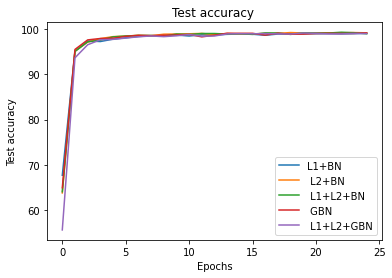

In [23]:
plot_test_loss_accuracy(tracker)

In [21]:
def plot_loss_change(tracker):
  for type_, d in tracker.items():
    for k, v in d.items():
      if k.lower() == "train_losses":
        x = [*range(len(v))]
        plt.plot(x, v, label=type_)

  plt.xlabel('Epochs')
  plt.ylabel('Train loss')
  plt.title('Train loss changes')
  plt.legend()    
  plt.plot()
  plt.savefig("S7_Train_loss_change.png", bbox_inches='tight')    

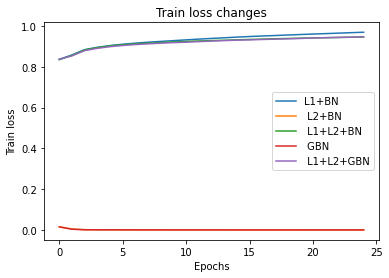

In [24]:
plot_loss_change(tracker)

In [22]:
def plot_test_loss_change(tracker):
  for type_, d in tracker.items():
    for k, v in d.items():
      if k.lower() == "test_losses":
        x = [*range(len(v))]
        plt.plot(x, v, label=type_)

  plt.xlabel('Epochs')
  plt.ylabel('Test loss')
  plt.title('Test loss changes')
  plt.legend()    
  plt.plot()
  plt.savefig("S7_Test_loss_change.png", bbox_inches='tight')    

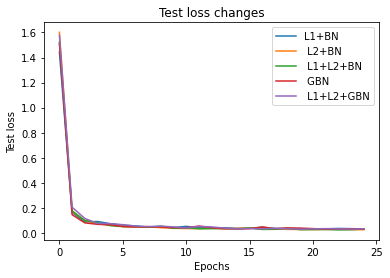

In [25]:
plot_test_loss_change(tracker)

## Showing misclassified for each combination or category

In [34]:
def plot_misclassified(tracker):
  for type_, d in tracker.items():
    print("\n\n", type_)
    for k, v in d.items():
      if k.lower() == "misclassified":
        fig = plt.figure(figsize = (10,10))
        for i in range(25):
              sub = fig.add_subplot(5, 5, i+1)
              plt.imshow(v[i][0].cpu().numpy().squeeze(),cmap='gray',interpolation='none')
              sub.set_title("Pred={}, Act={}".format(str(v[i][1].data.cpu().numpy()[0]),str(v[i][2].data.cpu().numpy())))
        plt.tight_layout()
        plt.title(type_)
        plt.show()
        plt.savefig(type_ + "_misclassified.png")



 L1+BN


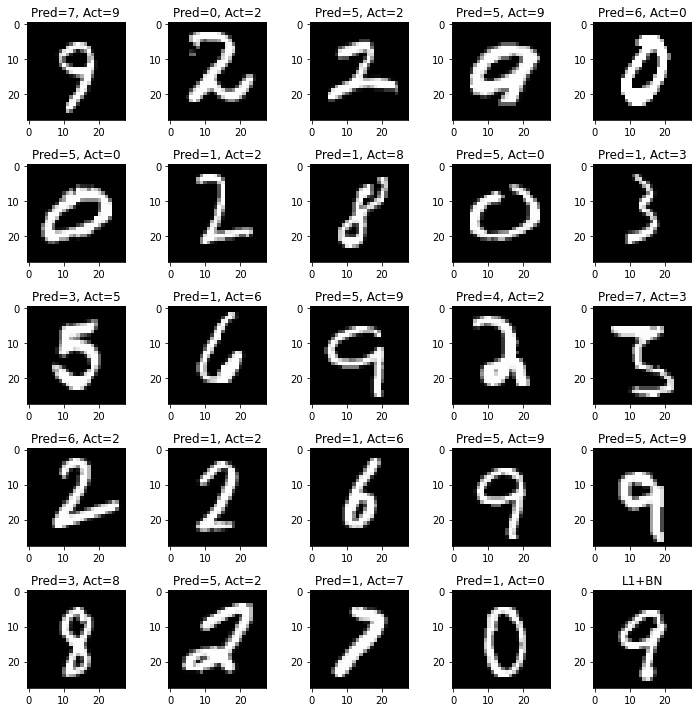



  L2+BN


<Figure size 432x288 with 0 Axes>

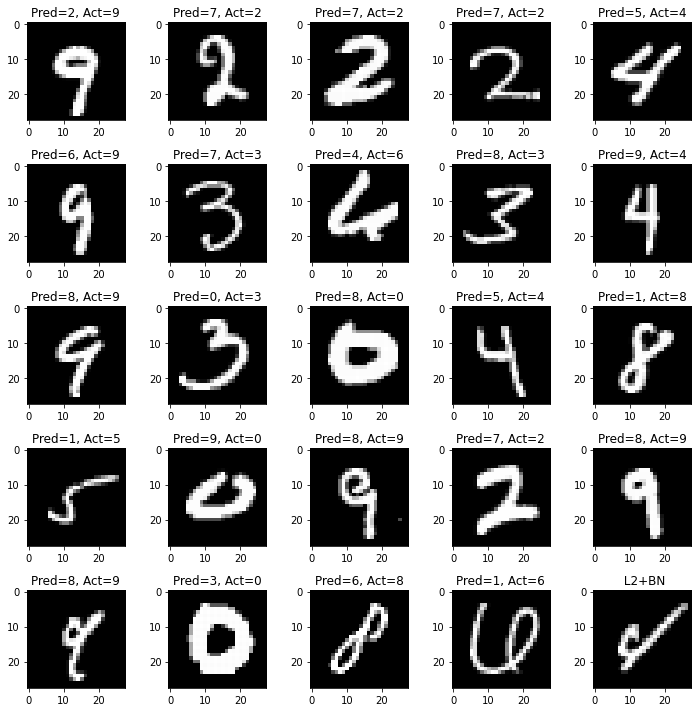



  L1+L2+BN


<Figure size 432x288 with 0 Axes>

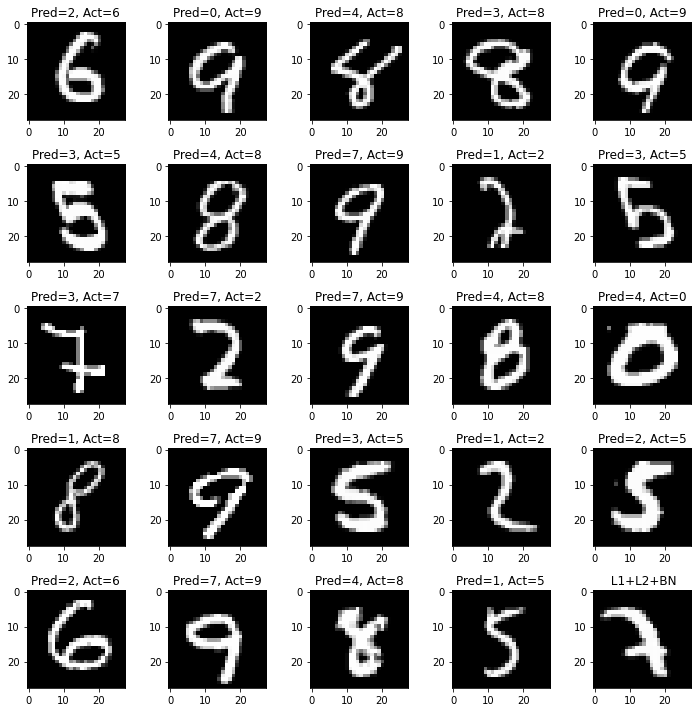



  GBN


<Figure size 432x288 with 0 Axes>

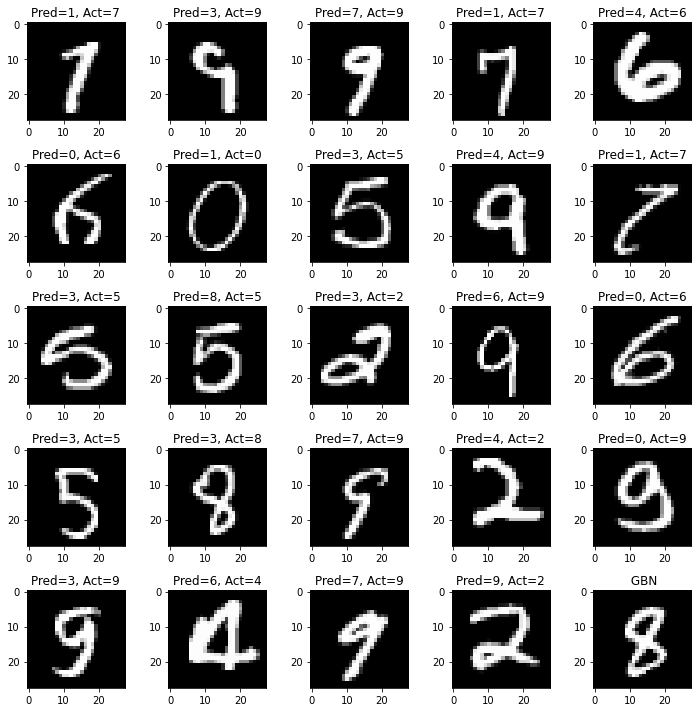



  L1+L2+GBN


<Figure size 432x288 with 0 Axes>

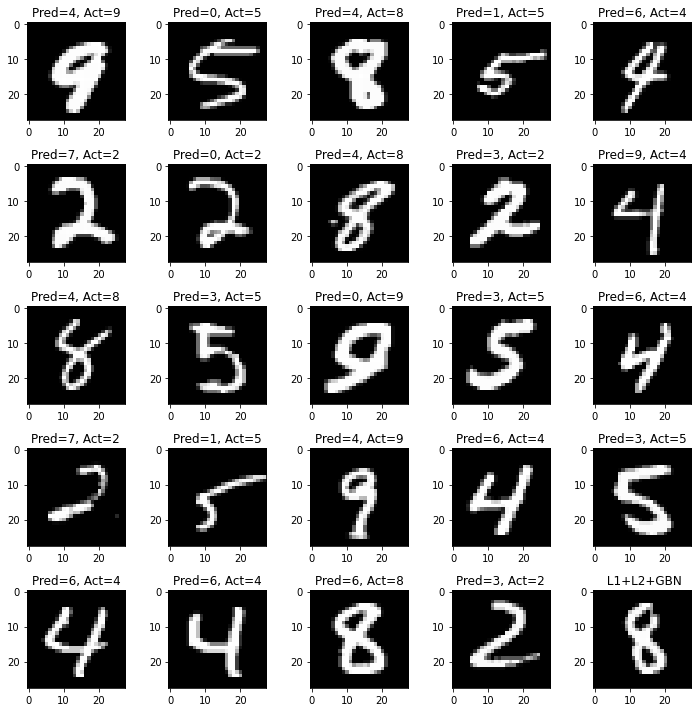

<Figure size 432x288 with 0 Axes>

In [35]:
plot_misclassified(tracker)